In [1]:
# Importando as bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [2]:
# Carregando a base de dados

df = pd.read_csv('PS4_GamesSales.csv', encoding='latin1')

df.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [3]:
# Dimenssão

df.shape

(1034, 9)

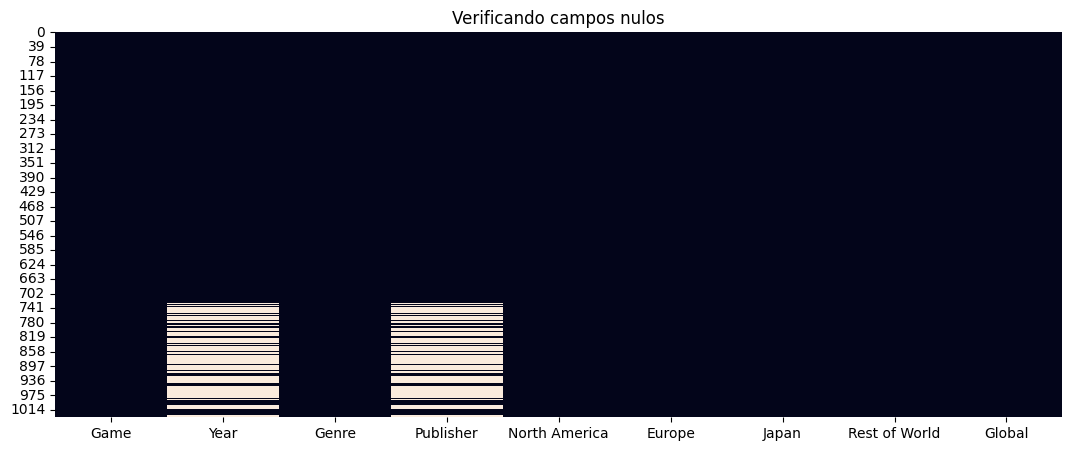

In [4]:
# Campos nulos

plt.figure(figsize=(13,5))
plt.title('Verificando campos nulos')
sns.heatmap(df.isnull(), cbar=False);

In [5]:
# Removendo campos nulos

df.dropna(inplace=True)

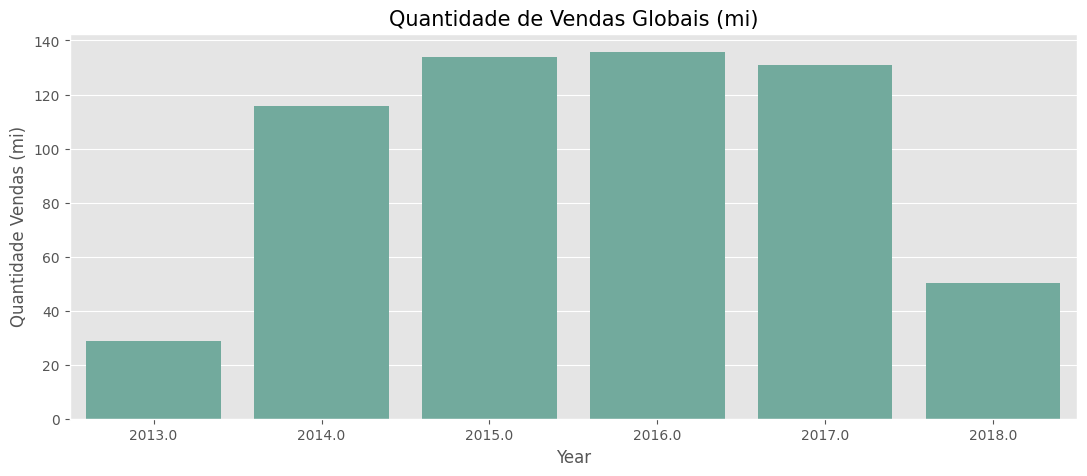

In [29]:
# Analisando quantidade de vendas por ano

plt.figure(figsize=(13,5))
plt.title('Quantidade de Vendas Globais (mi)', fontsize=15)

sns.barplot(
    data=df,
    x='Year',
    y='Global',
    color='#69b3a2',
    estimator=sum,
    errorbar=None)

plt.ylabel('Quantidade Vendas (mi)');

In [7]:
# Removendo os anos com campos nulos

df = df.loc[(df['Year'] != 2019) & (df['Year'] != 2020)]

df.shape

(805, 9)

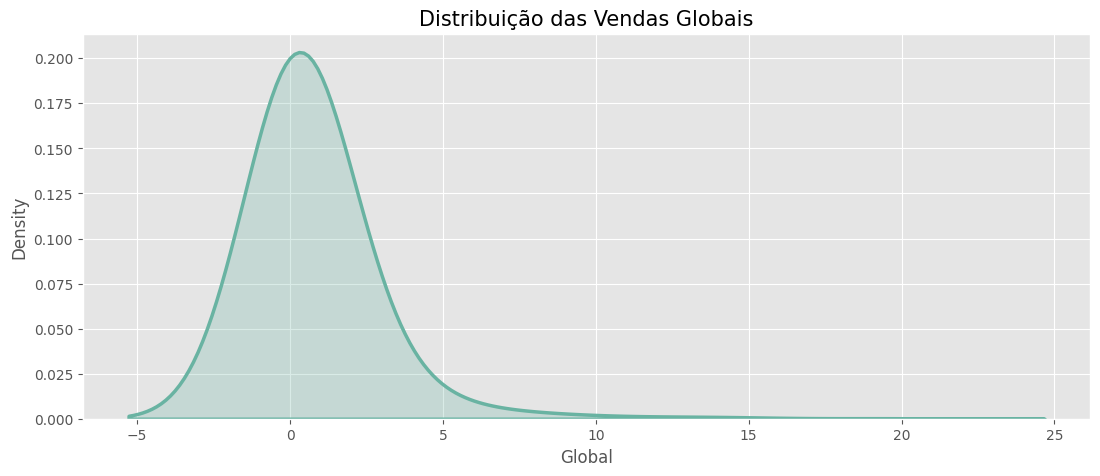

In [25]:
# Analisando a concentração das vendas

plt.figure(figsize=(13, 5))
plt.style.use('ggplot')
plt.title('Distribuição das Vendas Globais', fontsize=15)

sns.kdeplot(
    df['Global'],
    fill=True,
    bw_method=1,
    color='#69b3a2',
    linewidth=2.5
  );

In [9]:
analise = df.groupby(by=['Year']).sum()

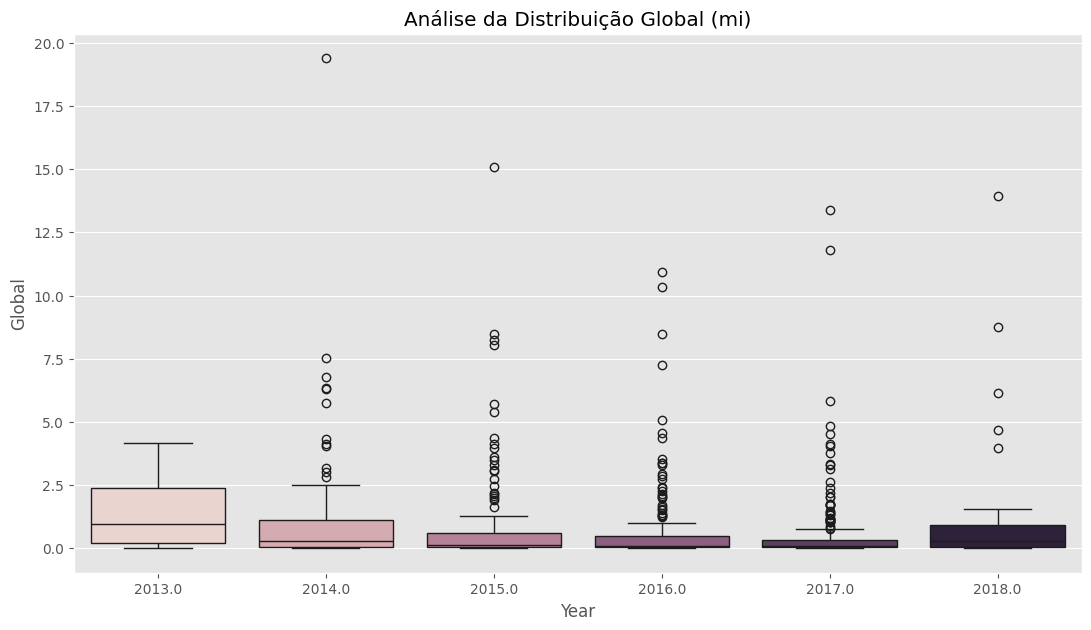

In [10]:
# Analisando outliers

plt.figure(figsize=(13, 7))
plt.title('Análise da Distribuição Global (mi)')
sns.boxplot(data=df, x='Year', y='Global', hue='Year', legend=False);

In [11]:
# Jogos acima de 10 milhões de vendas

df.loc[df['Global'] > 10]

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
5,FIFA 17,2016.0,Sports,Electronic Arts,1.26,7.95,0.12,1.61,10.94
6,Uncharted (PS4),2016.0,Action,Sony Interactive Entertainment,4.49,3.93,0.21,1.70,10.33


In [12]:
# Analisando a proporção dos 100% de cada região comparado ao total

America = [America / Total * 100 for America, Total in zip(analise['North America'], analise['Global'])]
Europa = [Europa / Total * 100 for Europa, Total in zip(analise['Europe'], analise['Global'])]
Japao = [Japao / Total * 100 for Japao, Total in zip(analise['Japan'], analise['Global'])]
Mundo = [Mundo / Total * 100 for Mundo, Total in zip(analise['Rest of World'], analise['Global'])]

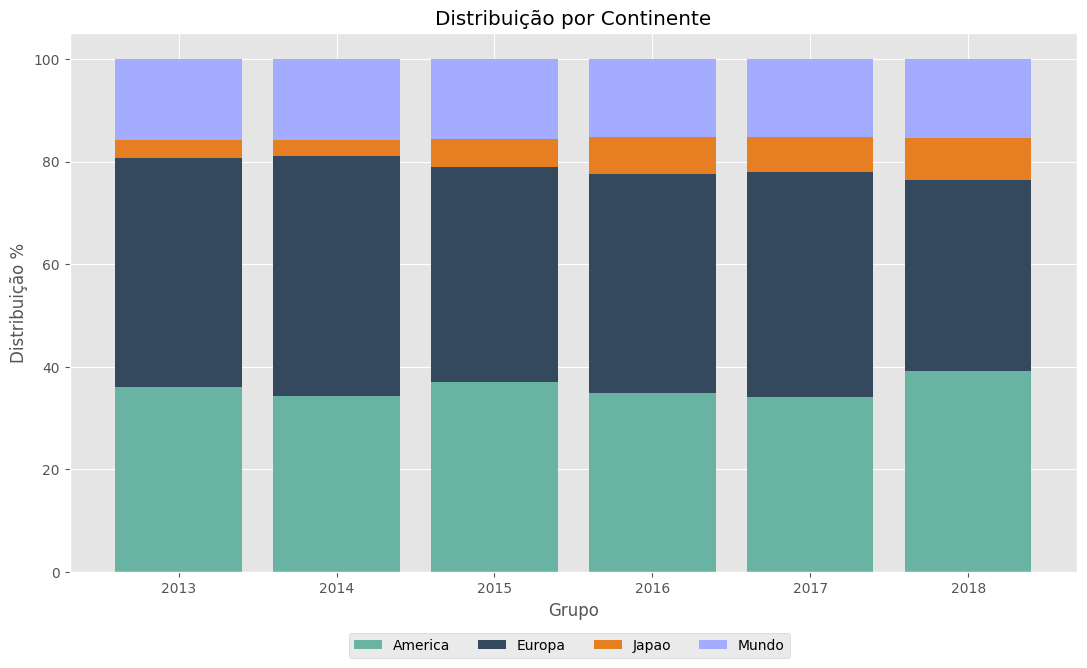

In [13]:
# Porcentagem em relação ao total vendido por continente

plt.figure(figsize=(13, 7))

plt.title('Distribuição por Continente')

grupos = [2013, 2014, 2015, 2016, 2017, 2018]

plt.bar(grupos, America, width=0.80, color='#69b3a2')
plt.bar(grupos, Europa, width=0.80, color='#34495e', bottom=America)
plt.bar(grupos, Japao, width=0.80, color='#e67e22', bottom=[A+B for A, B in zip(America, Europa)])
plt.bar(grupos, Mundo, width=0.80, color='#a3acff', bottom=[A+B+C for A, B, C in zip(America, Europa, Japao)])

plt.xlabel('Grupo')
plt.ylabel('Distribuição %')
plt.legend(['America', 'Europa', 'Japao', 'Mundo'], loc='upper left', bbox_to_anchor=(0.27, -0.1), ncol=4);

In [14]:
# Fazendo a conversão do Produtor, Genero e Jogo

from sklearn.preprocessing import LabelEncoder

funcao_label = LabelEncoder()

df['Produtor'] = funcao_label.fit_transform(df['Publisher'])
df['Genero'] = funcao_label.fit_transform(df['Genre'])
df['Jogo'] = funcao_label.fit_transform(df['Game'])

df.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Produtor,Genero,Jogo
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39,107,0,273
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09,8,12,98
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94,107,1,521
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40,8,12,102
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80,40,14,222


In [15]:
paleta_cores = sns.color_palette('husl', 8)
paleta_cores

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.8087954113106306, 0.5634700050056693, 0.19502642696727285),
 (0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
 (0.19783576093349015, 0.6955516966063037, 0.3995301037444499),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.22335772267769388, 0.6565792317435265, 0.8171355503265633),
 (0.6423044349219739, 0.5497680051256467, 0.9582651433656727),
 (0.96038885399407, 0.3814317878772117, 0.8683117650835491)]

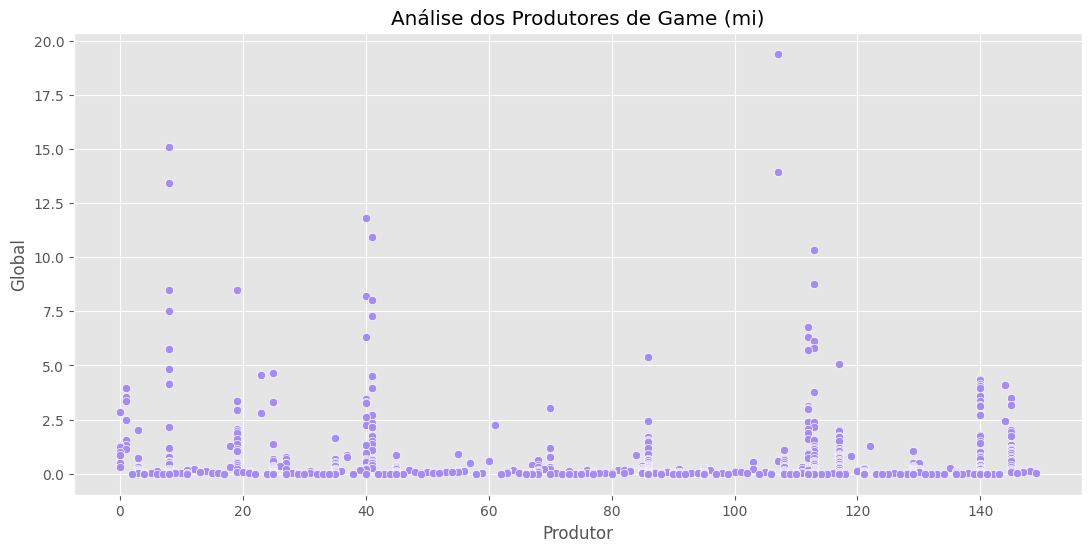

In [16]:
plt.figure(figsize=(13, 6))
plt.title('Análise dos Produtores de Game (mi)')
sns.scatterplot(data=df, x='Produtor', y='Global', color=paleta_cores[6]);

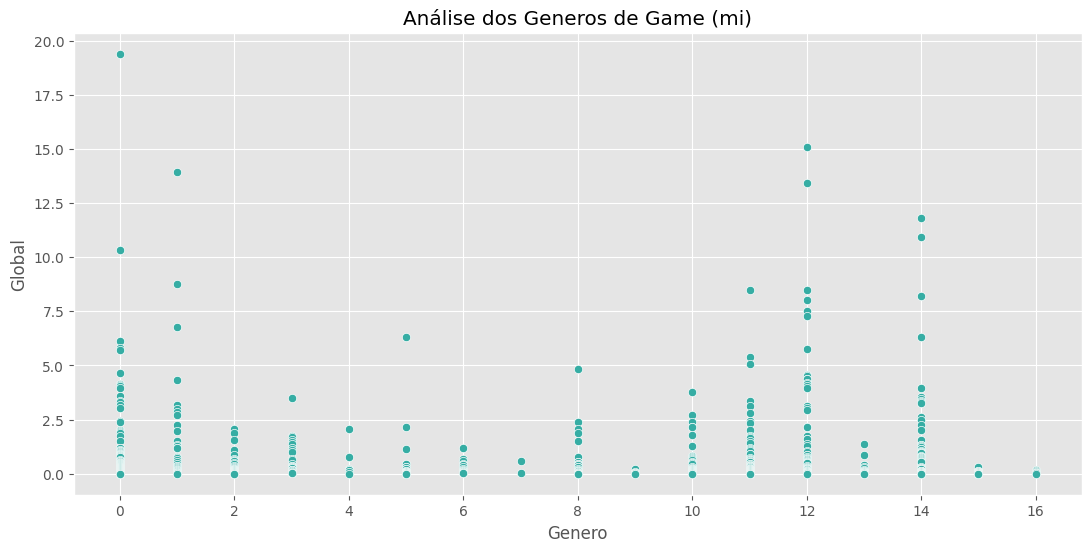

In [17]:
plt.figure(figsize=(13, 6))
plt.title('Análise dos Generos de Game (mi)')
sns.scatterplot(data=df, x='Genero', y='Global', color=paleta_cores[4]);

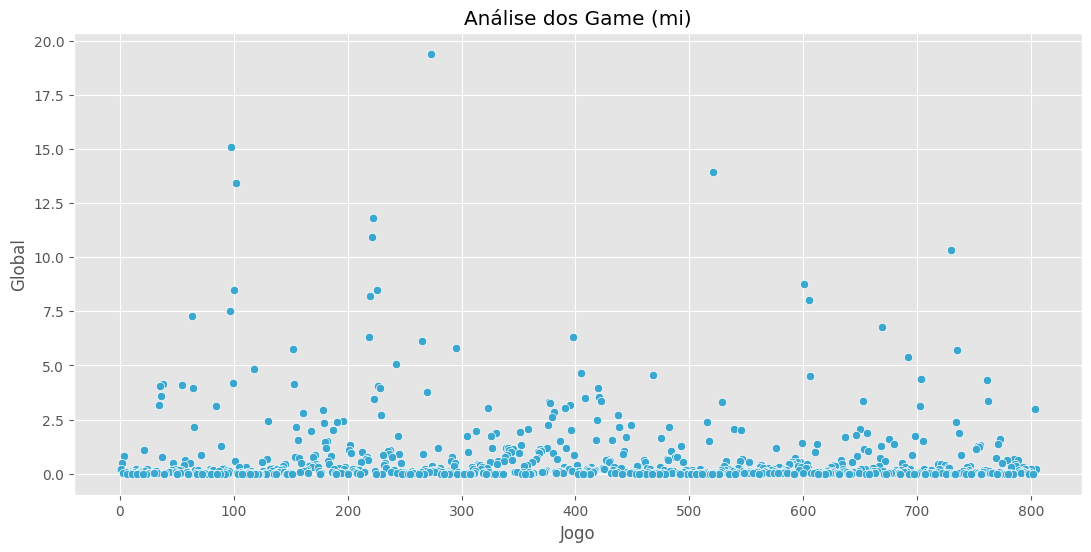

In [18]:
plt.figure(figsize=(13, 6))
plt.title('Análise dos Game (mi)')
sns.scatterplot(data=df, x='Jogo', y='Global', color=paleta_cores[5]);

In [19]:
df.to_csv('PS4_GamesSalesLimpo.csv', index=False)